# House Price Prediction Project
# XGBoost Regression (Decision Tree)
### **YouTube Link**: https://youtu.be/fw5rkjq4Tfo?si=HYlFr8jLG8LHBqOg
### **Practiced by**: Mariah Noelle Cornelio
### **Date**: October 6, 2024
This project is used to predict house prices in the future in the California area by looking at factors such as tax rates, crime rate, or size of that area. I am using this project to PRACTICE machine learning techniques. 
- All credit goes to @Siddhardhan on YouTube, amazing guy!
- The link to his video is here: https://youtu.be/fw5rkjq4Tfo?si=HYlFr8jLG8LHBqOg
- The dataset used was the California Housing dataset 

**VERY IMPORTANT NOTE:** The original dataset used in this video was the Boston House Pricing dataset but there is a major ethical issue with that (explained below) so I will be using the California one instead for this example. Ethics and respect to communities is still very much important when doing data analysis!

## Importing and Preprocessing Data

In [4]:
# !pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/99/a1/5219921a9bcb5388623f81908ff43d606aec2e512e0c02f6eb49f3b3caa8/xgboost-2.1.1-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.1 MB/s eta 0:00:00a 0:00:01


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor # This is the XGBoost Regressor
from sklearn import metrics

from sklearn.datasets import fetch_california_housing

In [2]:
# Import the Boston House Price dataset from sklearn.datasets
house_price_dataset=sklearn.datasets.load_boston()

# Since there is an ethical issue with this dataset, we will NOT be using it
# It is highly discouraged to use the Boston dataset! There are alternative datasets provided below
# I will use the California housing dataset instead

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [9]:
california_housing=fetch_california_housing(as_frame=True)
house_price_dataset=california_housing.frame
house_price_dataset.head()

# The MedHouseVal is the target and it represents the median housing value

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
house_price_dataset.shape

(20640, 9)

In [11]:
# Check for missing values
house_price_dataset.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [12]:
# Statistics of the dataset
house_price_dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Visualizing and Understanding the Correlation Between the Features

<Axes: >

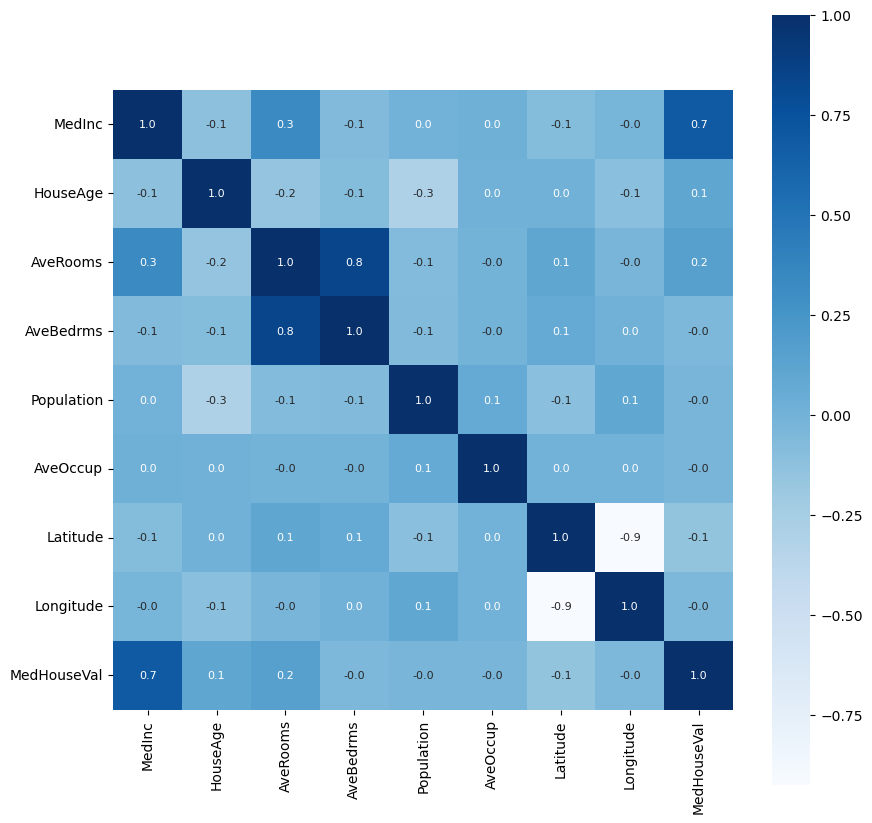

In [19]:
correlation=house_price_dataset.corr()
# There is positive and negative correlation +1 and -1
# Positive: if one value increases, the other increases
# Negative: if one value decreases, the other decreases

plt.figure(figsize=(10,10))# Size of the plot
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True,
           annot_kws={"size":8}, cmap="Blues")

# cbar means colorbar, it is the thing on the right
# square means all the values are mentioned in the square
# fmt is the float values (value after the decimal point)
# annot are the feature names on the sides and bottoms 
# annot_kws is changing the size of the characters
# cmap is the color of the map, in this case the color theme is blue

# The diagonal is not significant

## Splitting the Dataset Into Training and Testing

In [20]:
X=house_price_dataset.drop(["MedHouseVal"], axis=1)
y=house_price_dataset["MedHouseVal"]

In [21]:
print(X)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [22]:
print(y)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=2)
# Here we do not have to stratify because we are predicting number values, not categories and classifying

## Model Training - XGBoost Regressor Decision Tree

In [25]:
model=XGBRegressor()
model.fit(X_train, y_train)

# If we standardize does it give different results?
# For decision trees, standardization is not generally required
# Find out which models work best with standardization!

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Evaluation

In [26]:
# You cannot find accuracy score for regression because we are comparing values, not classes
# But you CAN use metrics like MSE

# Prediction on training data
training_data_prediction=model.predict(X_train)
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [29]:
# Finding the R-squared error
score1=metrics.r2_score(y_train, training_data_prediction) # y_train is original data
# Gives the error given by our model - it finds the variance between the 2 data given from the regression

# Finding the Mean Absolute Error
score2=metrics.mean_absolute_error(y_train, training_data_prediction)
# Finds the difference between original data and prediction data (subtracts)

print("R^2 Erorr: ", score1)
print("Mean Absolute Error: ", score2)

# If the values are around 5-10, the error is big and we don't want that
# Here the values are pretty small which is what we want
# The more the data, the better the model performs

R^2 Erorr:  0.943650140819218
Mean Absolute Error:  0.1933648700612105


### Visualizing the Actual Prices vs Predicted Prices

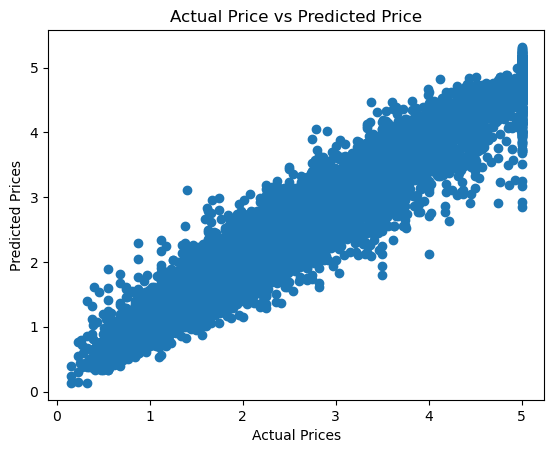

In [32]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

# Data points are close to each other, meaning predicted is close to actual pricing

In [31]:
# Prediction on the TEST data
test_data_prediction=model.predict(X_test)
score1=metrics.r2_score(y_test, test_data_prediction)
score2=metrics.mean_absolute_error(y_test, test_data_prediction)

print("R^2 Erorr: ", score1)
print("Mean Absolute Error: ", score2)

# Smaller r^2 error and slightly larger mean absolute error but it is still pretty good

R^2 Erorr:  0.8338000331788725
Mean Absolute Error:  0.3108631800268186


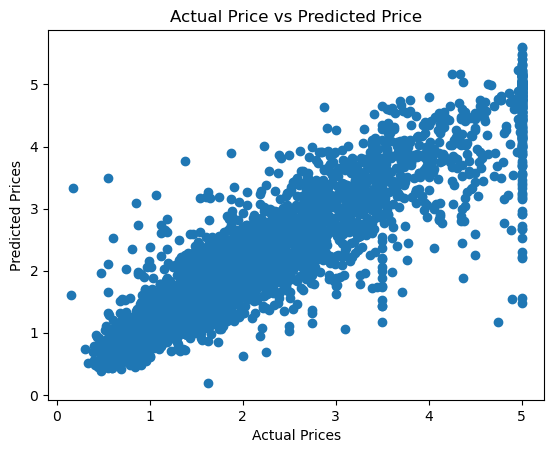

In [33]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()